In [ ]:
!pip install numpy==1.19.0
!pip install matplotlib==3.3.0
!pip install seaborn==0.11.0
!pip install pandas==1.0.0

In [ ]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [ ]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
# Описание набора данных

print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# данные (признаки) в формате матрицы 2D с размерностью [кол-во примеров, кол-во признаков];
feature_data = boston_data['data']
#названия признаков;
feature_names = boston_data['feature_names']
#значения целевой переменной для предсказания в формате вектора 1D по кол-ву примеров.
target_data = boston_data['target']

print(type(feature_data))
print(type(target_data))

print(feature_data.shape)
print(target_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


In [ ]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# Перевод в формат pandas
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Добавим столбец цены
df['PRICE'] = target_data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Подготовка данных
# Информация о данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [ ]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [ ]:
# Сначала приведем к int, чтобы вместо 0.0 и 1.0 были значения 0 и 1
# Затем приведем к типу категорий
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


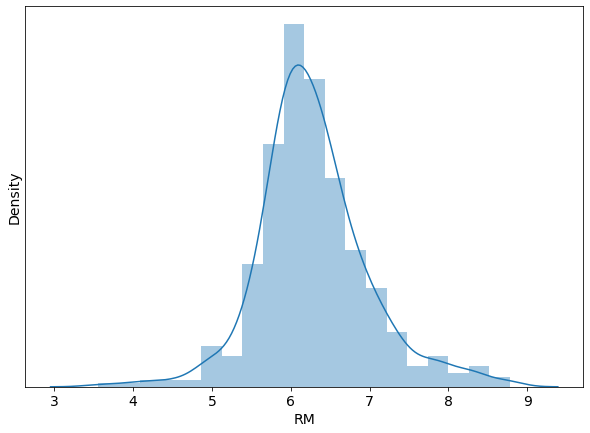

In [ ]:
#Анализ распределений
# Под нормальным (Гауссовым) распределением понимается распределение следующего вида:

plt.figure(figsize=[10, 7])
sns.distplot(df['RM'], bins=20)
# Отключение меток на оси Y
plt.yticks([])
plt.show()

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


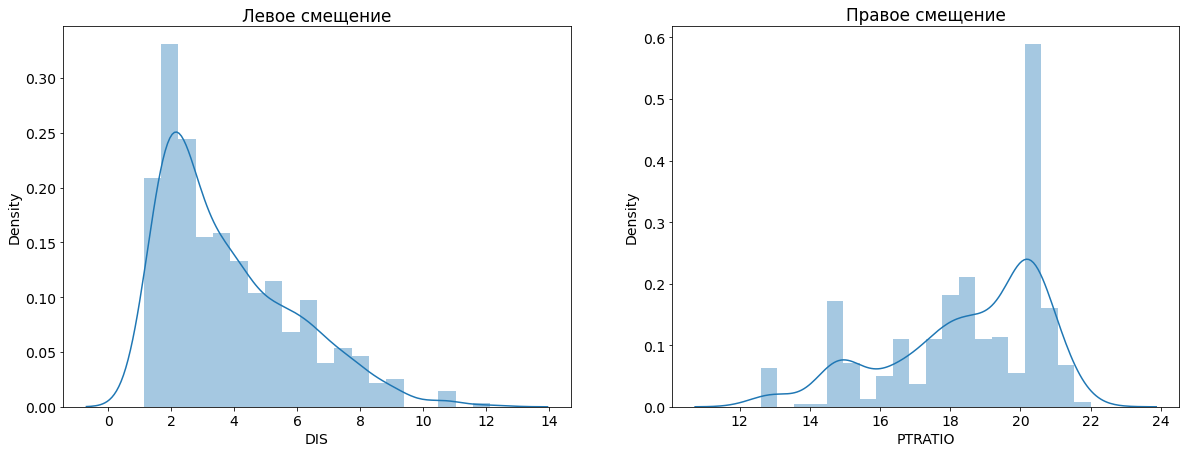

In [ ]:
# Смещение нормального распределения могут быть как левые (хвост находится справа), так и правое (хвост слева):
_, ax = plt.subplots(nrows=1, ncols=2, figsize=[20, 7])

sns.distplot(df['DIS'], ax=ax[0], bins=20)
ax[0].title.set_text('Левое смещение')

sns.distplot(df['PTRATIO'], ax=ax[1], bins=20)
ax[1].title.set_text('Правое смещение')

plt.show()

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


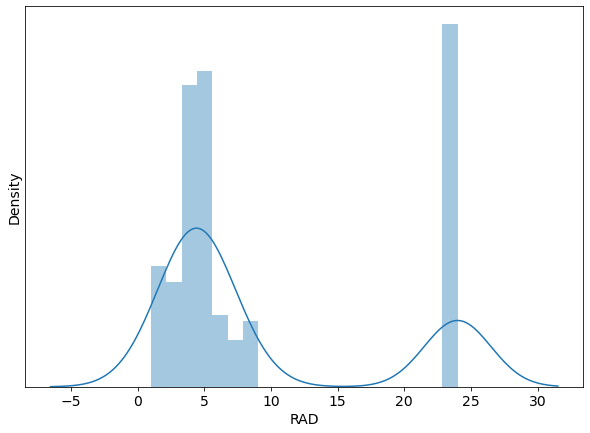

In [ ]:
# Распределения могут иметь и бимодальный характер:

plt.figure(figsize=[10, 7])
sns.distplot(df['RAD'], bins=20)
# Отключение меток на оси Y
plt.yticks([])
plt.show()

In [ ]:
# Для примера выберем следующие признаки

features = ['CRIM', 'NOX', 'RM', 'PRICE']
correlation_mtrx = df[features].corr()
correlation_mtrx

,CRIM,NOX,RM,PRICE
CRIM,1.000000,0.420972,-0.219247,-0.388305
NOX,0.420972,1.000000,-0.302188,-0.427321
RM,-0.219247,-0.302188,1.000000,0.695360
PRICE,-0.388305,-0.427321,0.695360,1.000000


<AxesSubplot:>

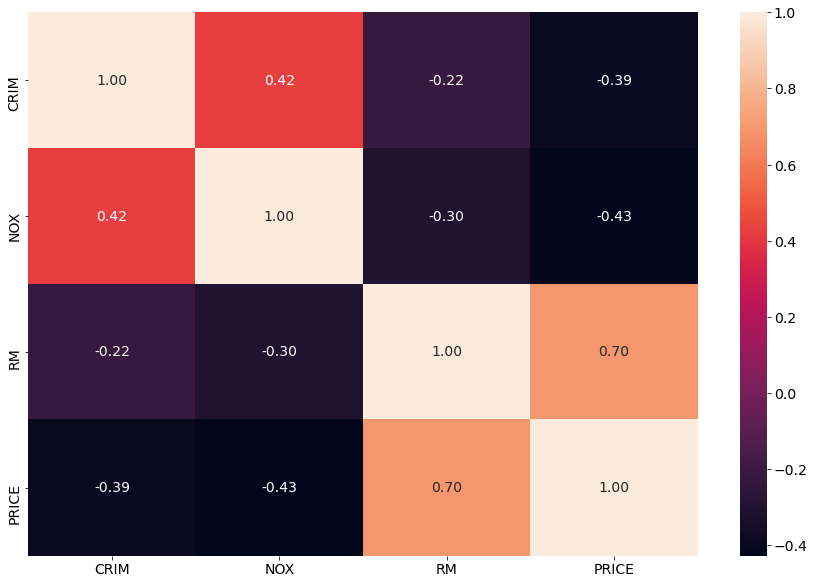

In [ ]:
# Два дополнительных аргумента добавляют числа на график и указывают формат вывода данных
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

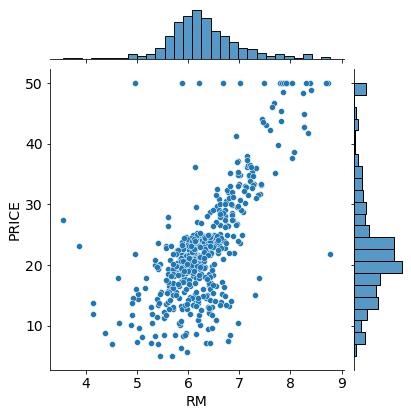

In [ ]:
# Визуальная оценка

sns.jointplot(x="RM", y="PRICE", data=df)

In [ ]:
# Обработка выборосов данных

outliers_count = df[df['PRICE'] == 50].shape[0]

print(outliers_count)
print(outliers_count/df.shape[0]*100)

16
3.1620553359683794


In [ ]:
# Разделение данных

from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

# Отображение размеров выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [ ]:
#Применение классов моделей

from sklearn.linear_model import LinearRegression

# Создаем объект
reg = LinearRegression()
# Обучаем на выборке для обучения
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Для отображения весов создадим функцию
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    if feature_names is None:  
        print(f'Weights: {weights}')
    else:
        # Функция zip() делает из двух списков один список пар значений
        pairs = zip(feature_names, weights)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {bias}')

In [ ]:
show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.13347010285294617
ZN | 0.035808913593232405
INDUS | 0.049522645220054805
CHAS | 3.1198351162853344
NOX | -15.417060895306605
RM | 4.05719923164538
AGE | -0.010820835184927734
DIS | -1.3859982431608777
RAD | 0.24272733982224884
TAX | -0.008702234365662177
PTRATIO | -0.9106852081102893
B | 0.011794115892573957
LSTAT | -0.5471133128239574
Bias: 31.63108403569261


In [ ]:
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true)
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000)
    plt.plot(line_pnts, line_pnts, 'k--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

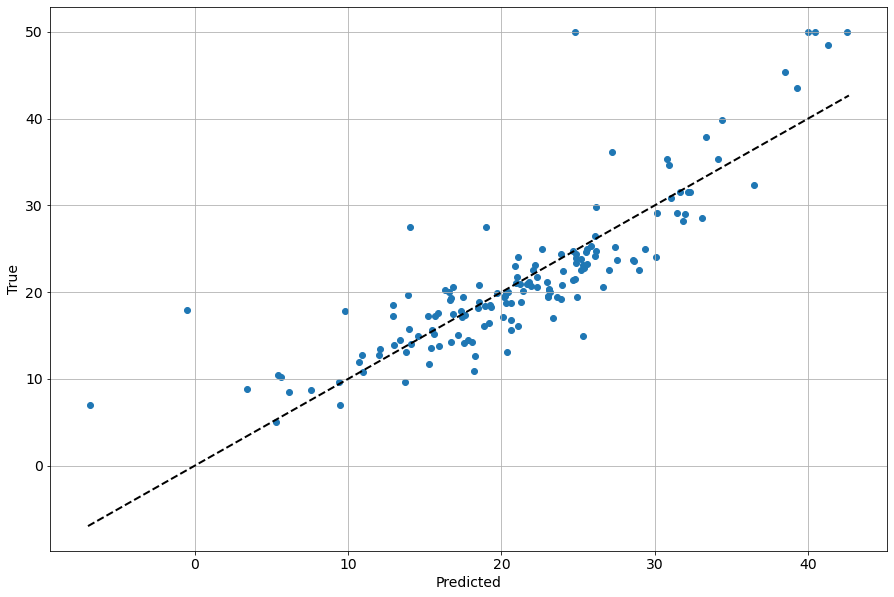

In [ ]:
y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


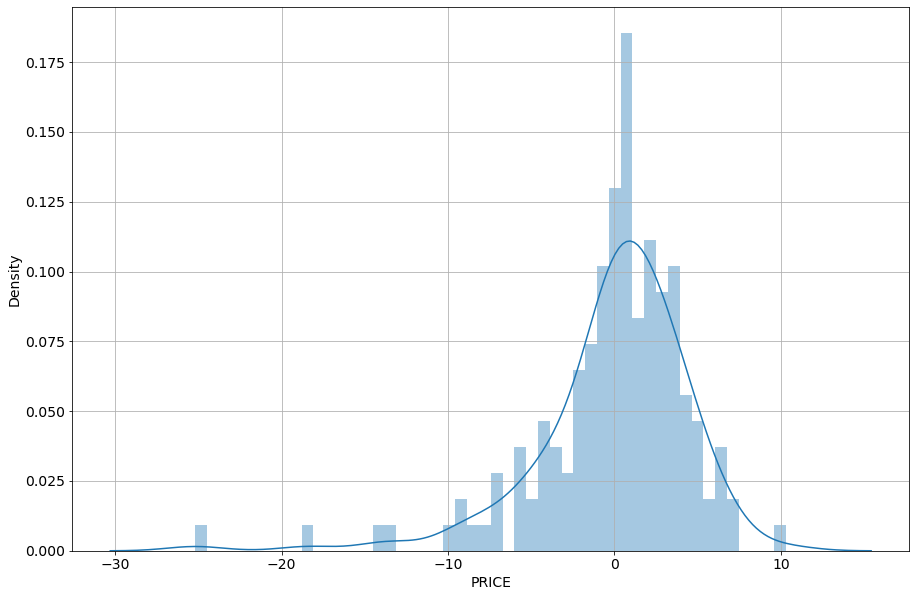

In [ ]:
# распределение ошибок

y_residuals = y_pred-y_test
sns.distplot(y_residuals, bins=50)
plt.grid()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

In [ ]:
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168204

----- Evaluation for test -----
  R2: 0.7112260057484905
  RMSE: 4.638689926172843
  MAE: 3.162709871457429


In [ ]:
# Применение классов трансформации
# Стандартизация

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -1.1083460154177536
ZN | 0.8084399775400806
INDUS | 0.34313465570479307
CHAS | 0.8138642573885868
NOX | -1.7980429490588994
RM | 2.9138579955497654
AGE | -0.2989391755039214
DIS | -2.942511476980697
RAD | 2.0941930300437637
TAX | -1.4470673128119858
PTRATIO | -2.0523223240868207
B | 1.0237518746405976
LSTAT | -3.8857900211493877
Bias: 23.01581920903955


In [ ]:
# Отображаем средние значения и стандартные отклонения
# Количество значений соответствует количеству признаков
means = scaler.mean_
stds = scaler.var_

pairs = zip(X_test.columns, means, stds)
for pair in pairs:
    print(f'{pair[0]} | Mean: {pair[1]} | Std: {pair[2]}')

CRIM | Mean: 3.4698868644067797 | Std: 68.95769533571193
ZN | Mean: 11.403954802259888 | Std: 509.69840243863507
INDUS | Mean: 11.133050847457625 | Std: 48.00887148329024
CHAS | Mean: 0.07344632768361582 | Std: 0.06805196463340676
NOX | Mean: 0.5572593220338984 | Std: 0.013601817610839798
RM | Mean: 6.325672316384181 | Std: 0.5158032768042389
AGE | Mean: 68.7997175141243 | Std: 763.2100846659645
DIS | Mean: 3.7658740112994353 | Std: 4.507242983448881
RAD | Mean: 9.437853107344633 | Std: 74.43822815921351
TAX | Mean: 407.04237288135596 | Std: 27651.323063295986
PTRATIO | Mean: 18.277966101694915 | Std: 5.078723546873504
B | Mean: 359.70180790960455 | Std: 7534.572880912254
LSTAT | Mean: 12.421129943502825 | Std: 50.443369909668355


# Начало самостоятельной работы
## Этап первый -расширенный анализ

In [ ]:
# расширенный анализ данных
# Оценка корреляции признаков
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

correlation_mtrx = df[features].corr()
correlation_mtrx

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


<AxesSubplot:>

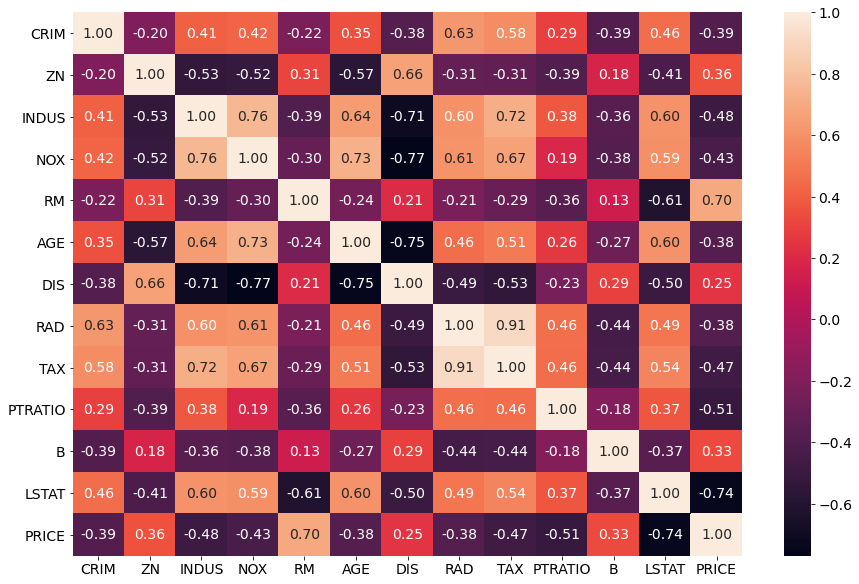

In [ ]:
# Тепловая карта
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


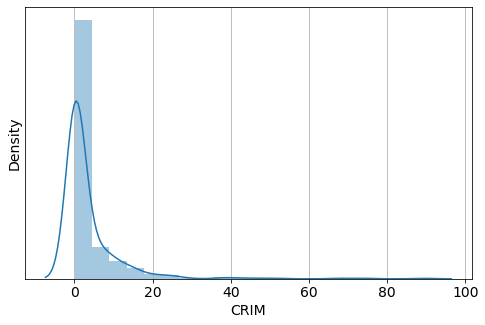

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


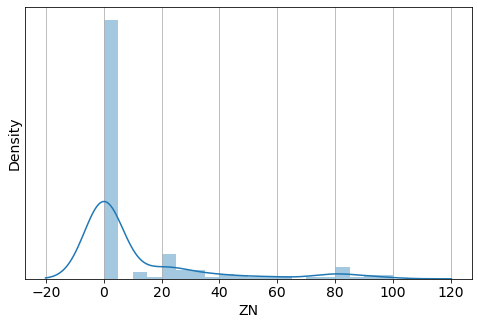

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


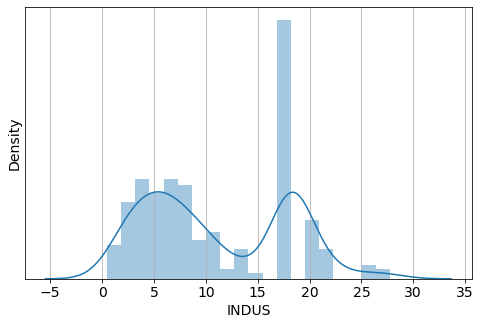

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


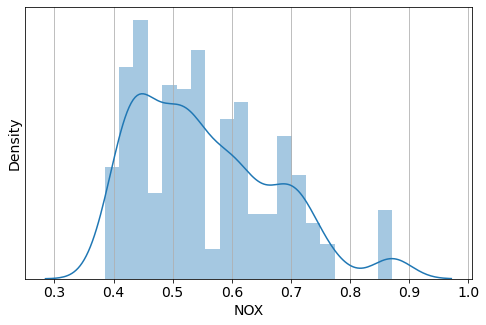

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


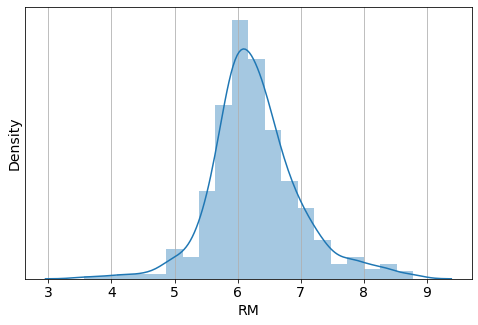

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


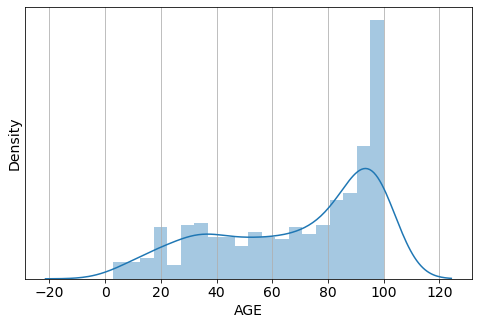

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


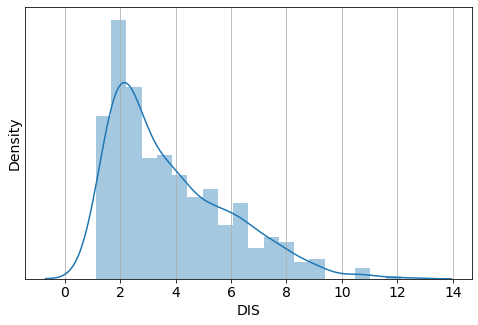

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


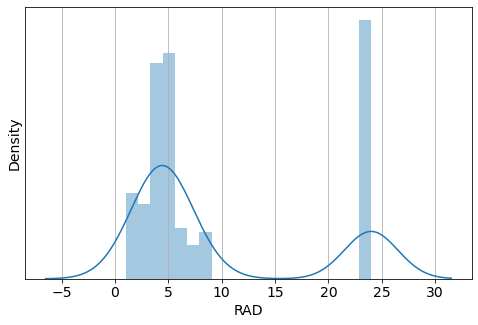

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


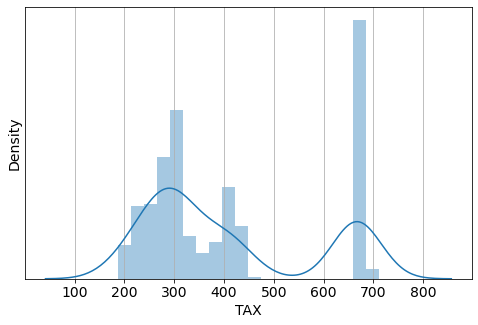

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


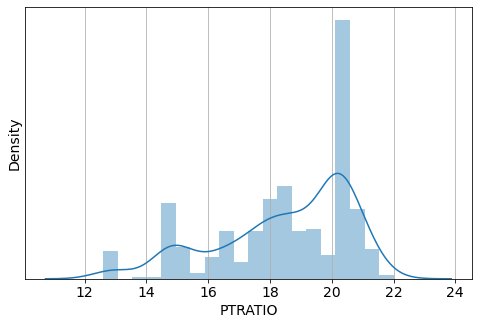

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


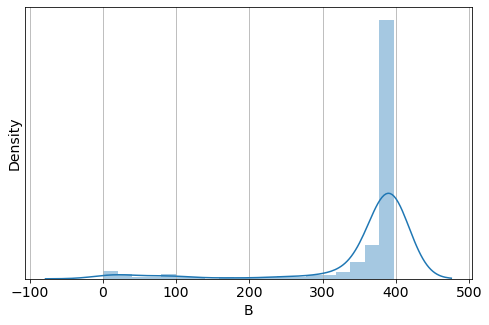

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


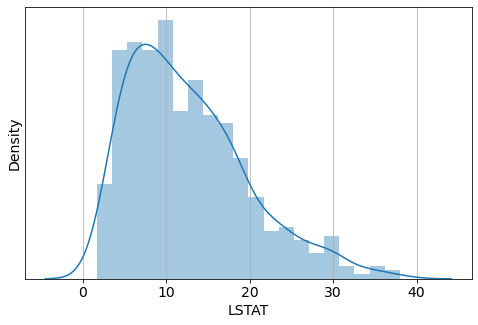

C:\Users\ksyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


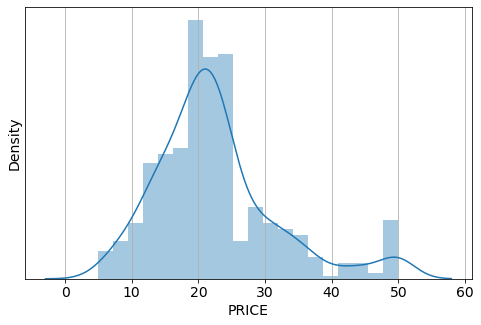

In [ ]:
#Расширенный анализ
# Оценка распределения признаков
for attribute in features:
    plt.figure(figsize=[8, 5])
    sns.distplot(df[attribute], bins=20)
    plt.grid(True)
    # Отключение меток на оси Y
    plt.yticks([])
    plt.show()
    

<Figure size 288x216 with 0 Axes>

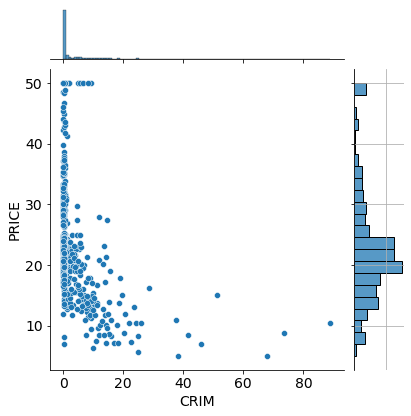

<Figure size 288x216 with 0 Axes>

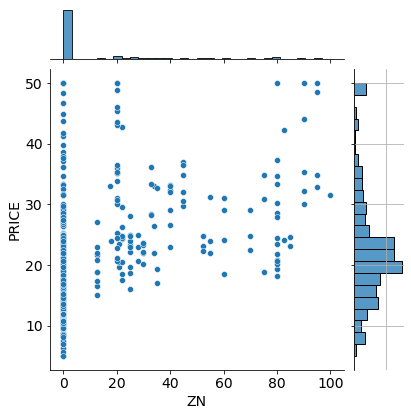

<Figure size 288x216 with 0 Axes>

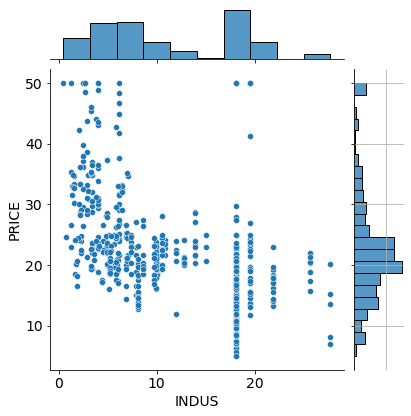

<Figure size 288x216 with 0 Axes>

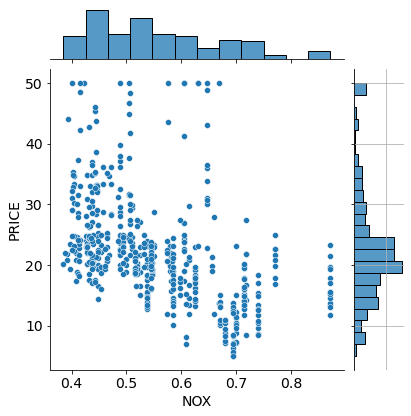

<Figure size 288x216 with 0 Axes>

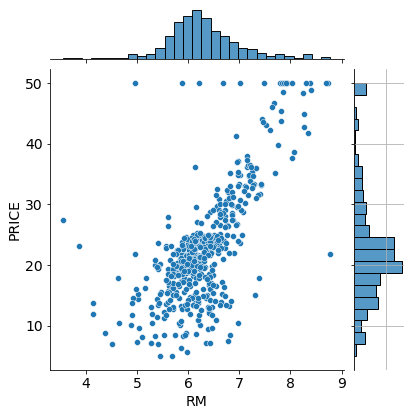

<Figure size 288x216 with 0 Axes>

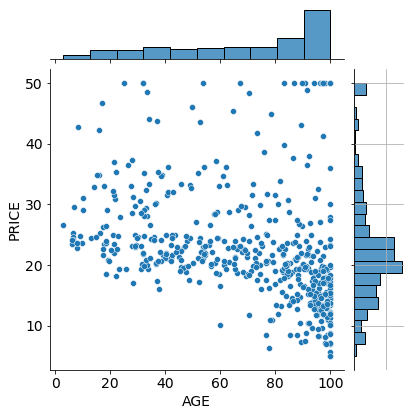

<Figure size 288x216 with 0 Axes>

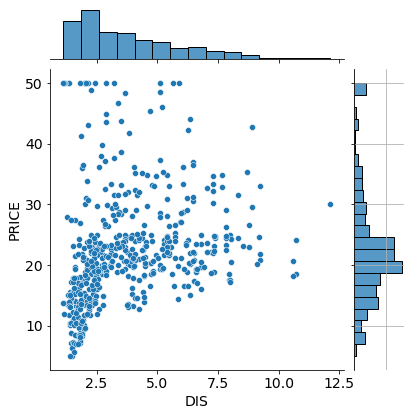

<Figure size 288x216 with 0 Axes>

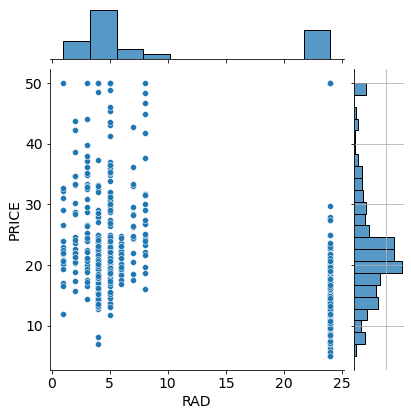

<Figure size 288x216 with 0 Axes>

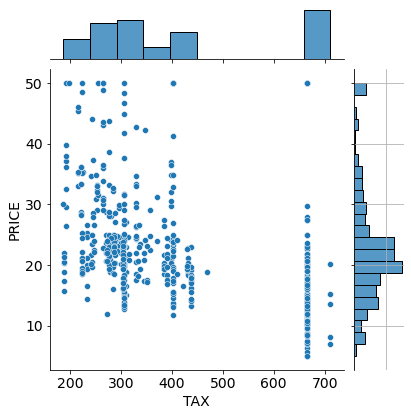

<Figure size 288x216 with 0 Axes>

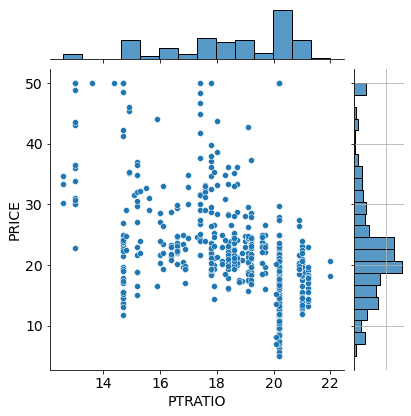

<Figure size 288x216 with 0 Axes>

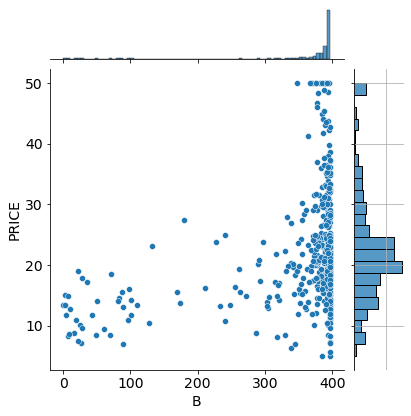

<Figure size 288x216 with 0 Axes>

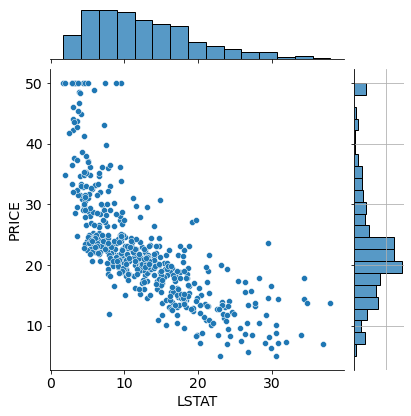

In [ ]:
# Расширенный анализ
# Оценrf характера зависимости целевой переменной от каждого признака
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for attribute in (features):
    plt.figure(figsize=[4, 3])
    sns.jointplot(x=attribute, y="PRICE", data=df)
    plt.grid(True)
    plt.show()


## Выводы по результатам анализа

В ходе детального анализа данных было установлено, что: 

1. Необходимо устранить выбросы в данных

2. Распределения каждого параметра далеки от нормального (кроме параметра RM - его распределение и так нормальное), это в дальнейшем тоже необходимо исправить

# Изучение работы инструментов нормализации данных


----- Weights -----
CRIM | -1.1083460154177536
ZN | 0.8084399775400806
INDUS | 0.34313465570479307
CHAS | 0.8138642573885868
NOX | -1.7980429490588994
RM | 2.9138579955497654
AGE | -0.2989391755039214
DIS | -2.942511476980697
RAD | 2.0941930300437637
TAX | -1.4470673128119858
PTRATIO | -2.0523223240868207
B | 1.0237518746405976
LSTAT | -3.8857900211493877
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484934
  RMSE: 4.63868992617282
  MAE: 3.1627098714574053


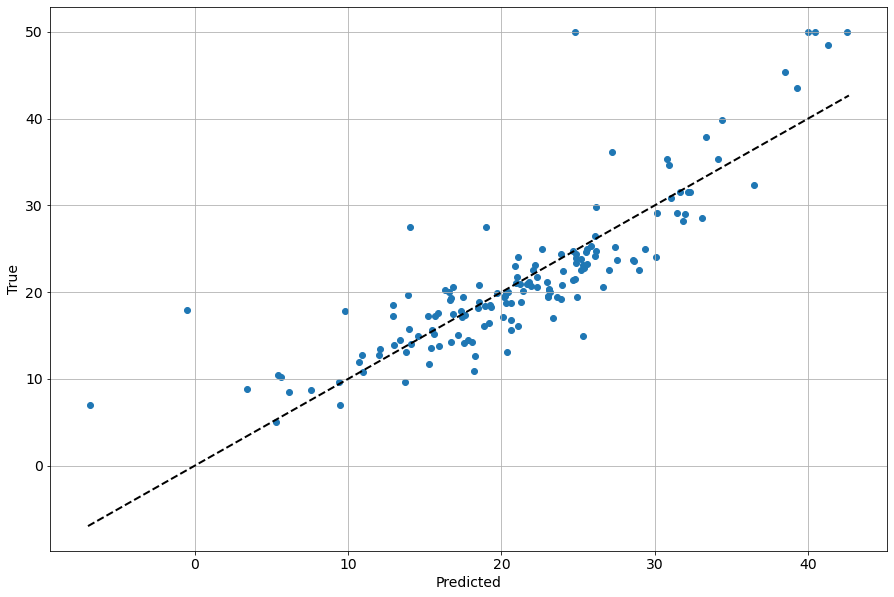

In [ ]:
# трансформер sklearn.preprocessing.StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)

show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -11.87445332633247
ZN | 3.4018467913571913
INDUS | 1.3138357776880016
CHAS | 3.11983511628539
NOX | -7.492691595119082
RM | 19.94924862200036
AGE | -1.0507030964564836
DIS | -15.241684080215858
RAD | 5.582728815911747
TAX | -4.559970807607133
PTRATIO | -8.560440956236707
B | 4.677310480676529
LSTAT | -19.827386456740182
Bias: 26.028229324073685

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168204

----- Evaluation for test -----
  R2: 0.7112260057484928
  RMSE: 4.638689926172824
  MAE: 3.1627098714574062


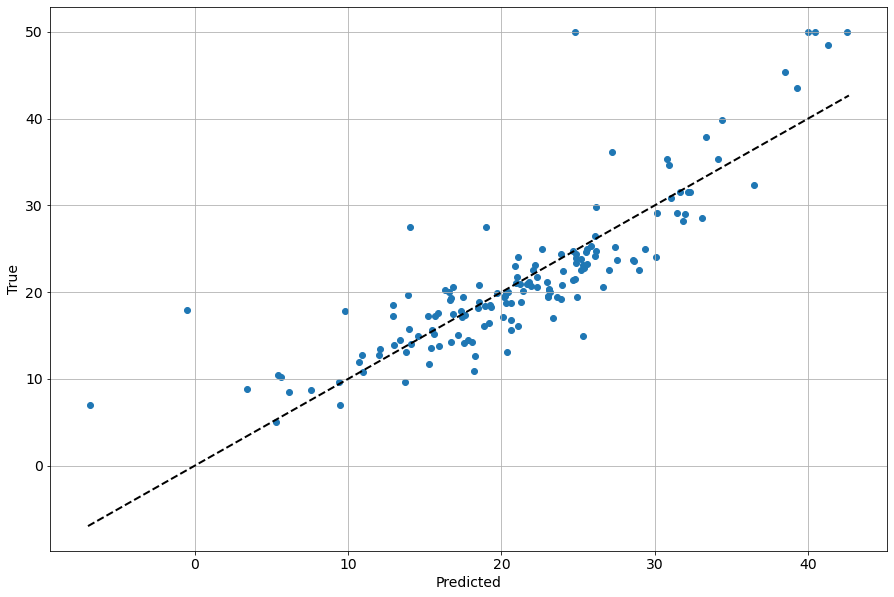

In [ ]:
# трансформер sklearn.preprocessing.MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)

show_linear_model_weights(reg, X_train.columns)

#Построение
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

При примении двух классов стандартизации (StandardScaler, MinMaxScaler) можно заметить следующее:

1. Оценки практически полностью совпадают (R2, RMSE, MAE)
2. Весовые коэффиценты признаков различны
3. Требуется уменьшение метрик RMSE, MAE (чем они меньше, тем лучше работает модель)
4. Требуется приблизить метрику R2 к единице (в случае если R2=1, отклонение предсказаний нулевое, чего мы и хотим добиться)

Итог: модель требует улучшений

# Изучение работы инструментов выравнивания распределений

C:\Users\ksyus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.13156466464394762
ZN | 0.19951252047411372
INDUS | -0.6619689410433693
CHAS | 0.8070988287388068
NOX | -1.5939759137391936
RM | 1.9532386683772835
AGE | 0.1400051001386935
DIS | -3.2702370734918658
RAD | 0.3842721775169041
TAX | 1.3322676295501878e-15
PTRATIO | -1.6118671671696465
B | 0.5688864225523942
LSTAT | -5.812179493282581
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628153
  MAE: 3.345254160076164

----- Evaluation for test -----
  R2: 0.7412232713454906
  RMSE: 4.391156466464552
  MAE: 3.1620670158148196


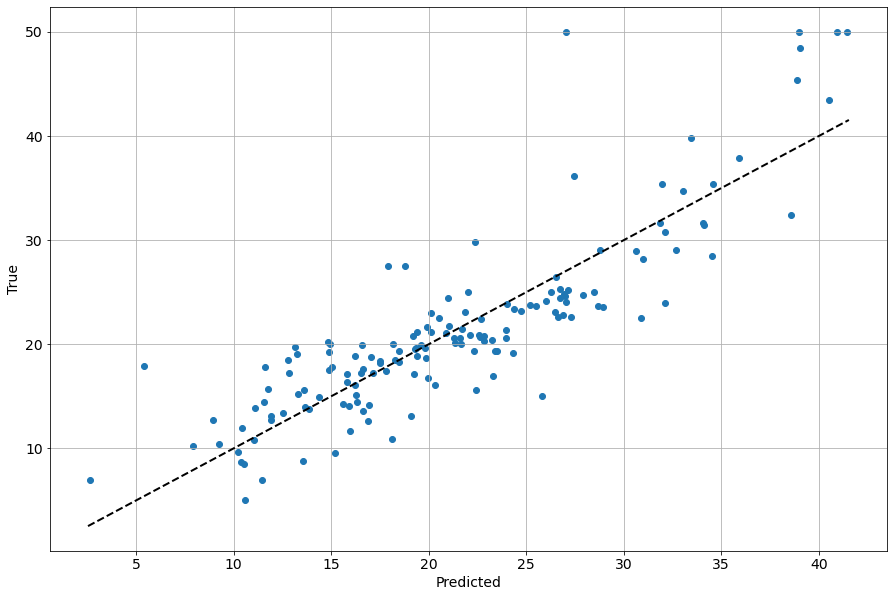

In [ ]:
# Применить трансформер sklearn.preprocessing.PowerTransformer к данным, 
#отобразить распределения после обработки, обучить модель на обработанных данных и оценить показатели;

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer();
reg = LinearRegression();

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)

#Построение
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -0.6444994640060197
ZN | 0.2140155063925
INDUS | -0.18824807670880297
CHAS | 0.2583745686870694
NOX | -1.0267803364953776
RM | 1.406830811187647
AGE | -0.03592474768129569
DIS | -3.422712975362629
RAD | 0.09737269638254908
TAX | -1.157250423775275
PTRATIO | -1.3454703091969848
B | -0.11386047440233894
LSTAT | -5.546587476524515
Bias: 24.974545106255817

----- Evaluation for train -----
  R2: 0.7564857894698906
  RMSE: 4.626451552594022
  MAE: 3.4579071240203088

----- Evaluation for test -----
  R2: 0.7474065053242428
  RMSE: 4.338377946721125
  MAE: 3.1761265961344027


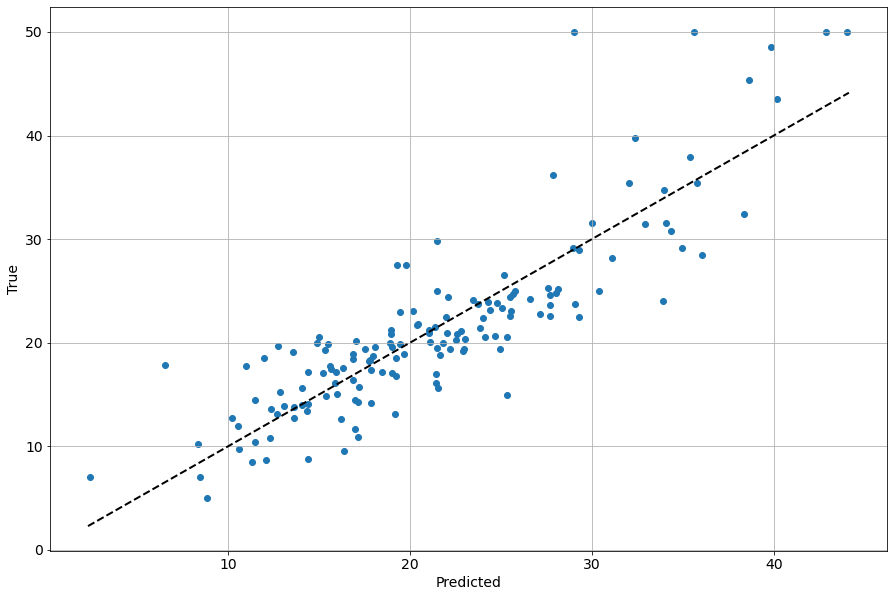

In [ ]:
# Применить трансформер sklearn.preprocessing.QuantileTransformer к данным, 
#отобразить распределения после обработки, обучить модель на обработанных данных и оценить показатели;

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=200,output_distribution='normal');
reg = LinearRegression();
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


Удалось увеличить R2 метрику, но незначительно. Требуется дальнейшее улучшение модели.

# Исключить выбросы на уровне PRICE == 50 из данных, обучить модель и оценить показатели

In [ ]:

outliers_count = df[df['PRICE'] == 50]
outliers_count

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0



----- Weights -----
CRIM | -0.1238187811735158
ZN | 0.04038991169296696
INDUS | -0.04633642800192696
CHAS | -0.029973239830882348
NOX | -14.688063333673206
RM | 3.333246719403874
AGE | -0.021294868200925618
DIS | -1.3881850773174005
RAD | 0.23160877762484752
TAX | -0.012433320325954574
PTRATIO | -0.8576286263011847
B | 0.0068984124742732175
LSTAT | -0.37531301066575357
Bias: 37.559933426105026

----- Evaluation for train -----
  R2: 0.7798306337503477
  RMSE: 3.778282589754244
  MAE: 2.7961504147140706

----- Evaluation for test -----
  R2: 0.7538446825846029
  RMSE: 3.5951405792699265
  MAE: 2.777513846897342


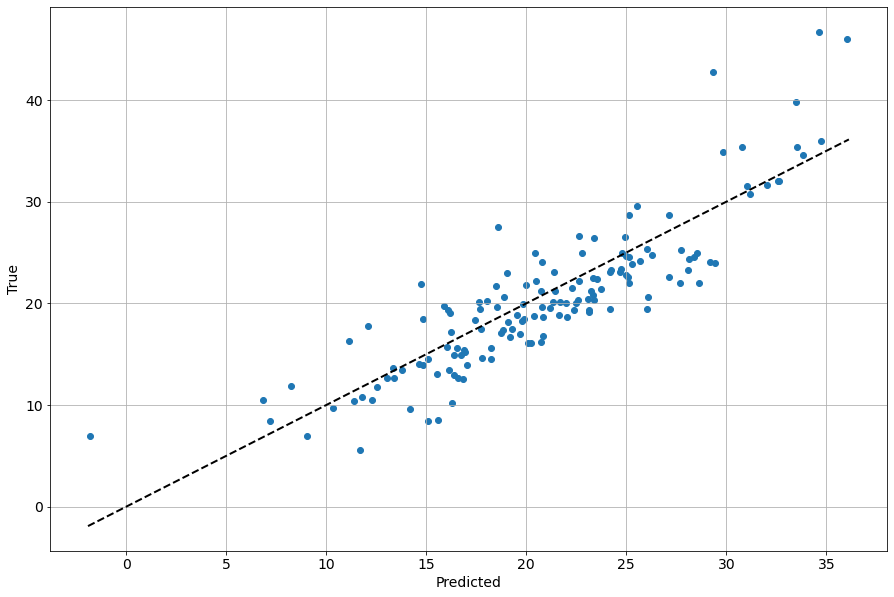

In [ ]:
outliers_count = df[df['PRICE'] == 50].index
new_df=df.drop(outliers_count,axis=0)

from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = new_df[feature_names]
# y - истинные значения (разметка)
y = new_df['PRICE']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

reg = LinearRegression()
reg.fit(X_train_new, y_train_new)
show_linear_model_weights(reg, X_train_new.columns)
y_pred = reg.predict(X_test_new)
draw_predictions_plot(y_pred, y_test_new)

evaluate_regressor(reg, X_train_new, y_train_new, 'train')
evaluate_regressor(reg, X_test_new, y_test_new, 'test')

In [ ]:
def new_evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)
    return r2_score_value, rmse_score, mae_score

In [ ]:
y = df['PRICE']
features_new = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_metrics = pd.DataFrame(columns = ['R2_train', 'RMSE_train', 'MAE_train','R2_test', 'RMSE_test', 'MAE_test'], index=list(features_new))

for i in features_new:
    X = df.drop(columns=[i,'PRICE'])
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
        X, y, 
    # Задается размер обучающей выборки
        train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
        random_state=RANDOM_STATE
    )
    reg = LinearRegression()
    reg.fit(X_train_new, y_train_new)
    y_pred = reg.predict(X_test_new)
    df_metrics.loc[i,['R2_train', 'RMSE_train', 'MAE_train']]=new_evaluate_regressor(reg, X_train_new, y_train_new, 'train')
    df_metrics.loc[i,['R2_test', 'RMSE_test', 'MAE_test']]=new_evaluate_regressor(reg, X_test_new, y_test_new, 'test')

df_metrics

,R2_train,RMSE_train,MAE_train,R2_test,RMSE_test,MAE_test
CRIM,0.735429,4.82233,3.3952,0.715061,4.60778,3.13734
ZN,0.740394,4.77686,3.39217,0.697831,4.74505,3.24995
INDUS,0.743151,4.75144,3.3615,0.71241,4.62917,3.14422
NOX,0.735551,4.82122,3.36302,0.690537,4.80198,3.23687
RM,0.693006,5.19458,3.72381,0.683052,4.85971,3.49986
AGE,0.74316,4.75135,3.36037,0.713868,4.61742,3.12911
DIS,0.718693,4.97251,3.49345,0.670199,4.95726,3.33199
RAD,0.736878,4.80911,3.36305,0.688301,4.8193,3.28564
TAX,0.740817,4.77298,3.36438,0.698385,4.7407,3.24129
PTRATIO,0.717197,4.98572,3.52619,0.676421,4.91028,3.50369


# Трансформер sklearn.preprocessing.PolynomialFeatures для генерации признака LSTAT в квадрате


----- Weights -----
CRIM | -0.15280616090498603
ZN | 0.020089204434392282
INDUS | 0.06774065481870453
CHAS | 2.6057394717883233
NOX | -14.010539660889572
RM | 3.0828754394175335
AGE | 0.010937689839600744
DIS | -1.188362099549094
RAD | 0.25074012252115857
TAX | -0.008665054355744321
PTRATIO | -0.7955990628936174
B | 0.009470211718918408
LSTAT | 1.865174681370263e-14
Bias: 41.667234450469934

----- Evaluation for train -----
  R2: 0.7900154484992744
  RMSE: 4.296150987499626
  MAE: 3.103043927750791

----- Evaluation for test -----
  R2: 0.7734457360506517
  RMSE: 4.108680995278845
  MAE: 2.9527724878930974


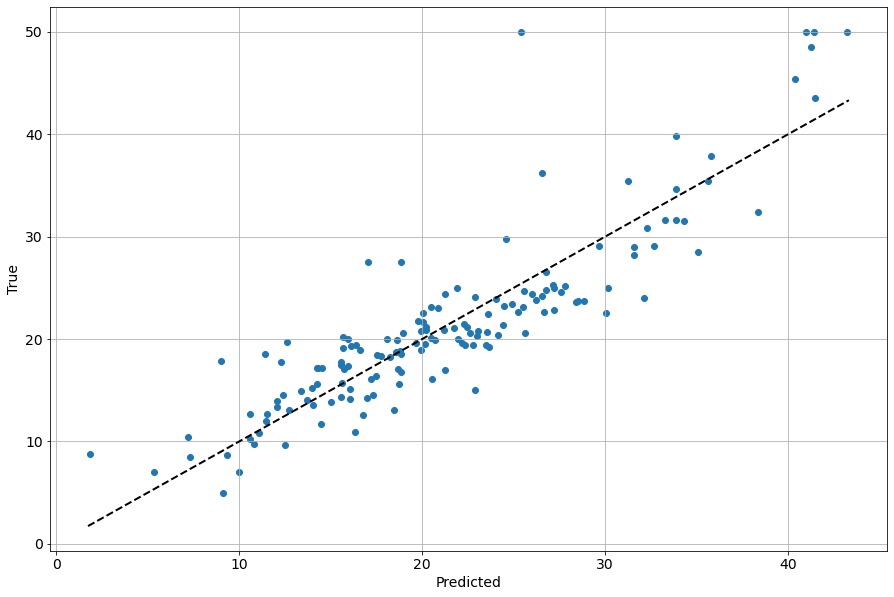

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
reg = LinearRegression();
#Выделяем необходимый признак и преобразуем его значения из строки в столбец
poly_X_train=np.array(X_train['LSTAT']).reshape(-1,1)
poly_X_test=np.array(X_test['LSTAT']).reshape(-1,1)
# "Обучение" трансформера - определение параметров средних и отклонений
poly.fit(poly_X_train)
# Стандартизация данных
X_train_scaled = poly.transform(poly_X_train)
X_test_scaled = poly.transform(poly_X_test)
#восстановление модели с новым признаком 
X_train_scaled = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

Вывод: при использовании трансформера sklearn.preprocessing.PolynomialFeatures удалось добиться значительного улучшения метрик: существенно уменьшилась метрика MAE, а также уменьшилась метрика RMSE.


# Создание базовой модели Ридж регрессии

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def r2_metric (reg, X, y, mode):
    y_pred = reg.predict(X)
    r2= r2_score(y, y_pred)
    return r2
    

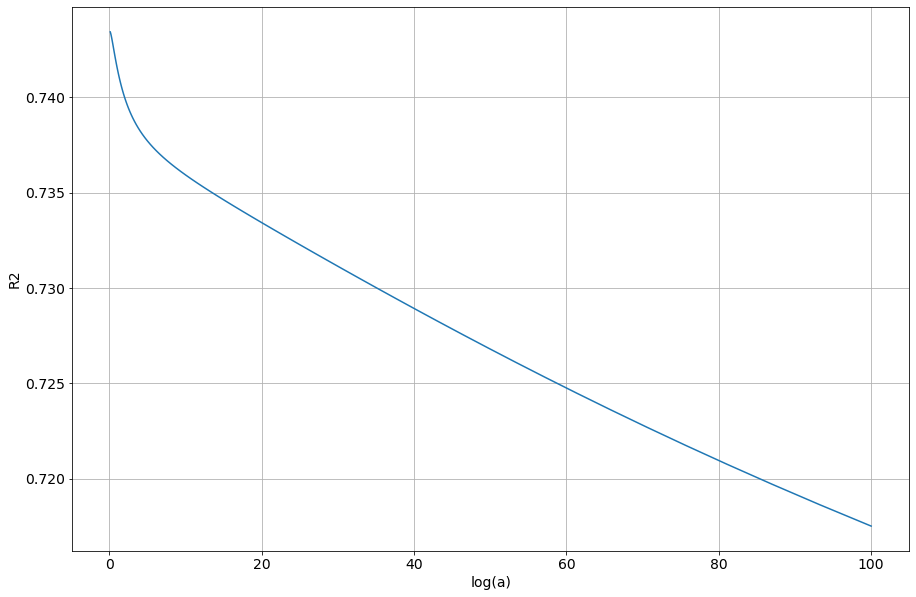

In [ ]:
from sklearn.linear_model import Ridge
#зададим альфа сразу в логарифмическом масштабе (т.к. на графие по оси х будет ее логарифм)
al=np.logspace(-1,2,100)
R2_ridg=[]
for i in al:
    reg = Ridge(alpha=i);
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    # Формирование массива из метрик R2
    R2_ridg.append(r2_metric(reg, X_train, y_train, 'train'))
    
plt.plot(al,R2_ridg)
plt.xlabel('log(a)')
plt.ylabel('R2')
plt.grid()
plt.show()



----- Weights -----
CRIM | -1.0959333352863267
ZN | 0.7882002902172326
INDUS | 0.3141384584121504
CHAS | 0.8194327673352374
NOX | -1.761591183619181
RM | 2.9199255180700843
AGE | -0.30160551718901984
DIS | -2.9023490235259226
RAD | 2.012782551948454
TAX | -1.3761150026099633
PTRATIO | -2.0411130244314433
B | 1.0209642536988492
LSTAT | -3.871160576592248
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.743482391414018
  RMSE: 4.748368933454408
  MAE: 3.3520641215891964

----- Evaluation for test -----
  R2: 0.7108071617209417
  RMSE: 4.642052735184101
  MAE: 3.161026516515537


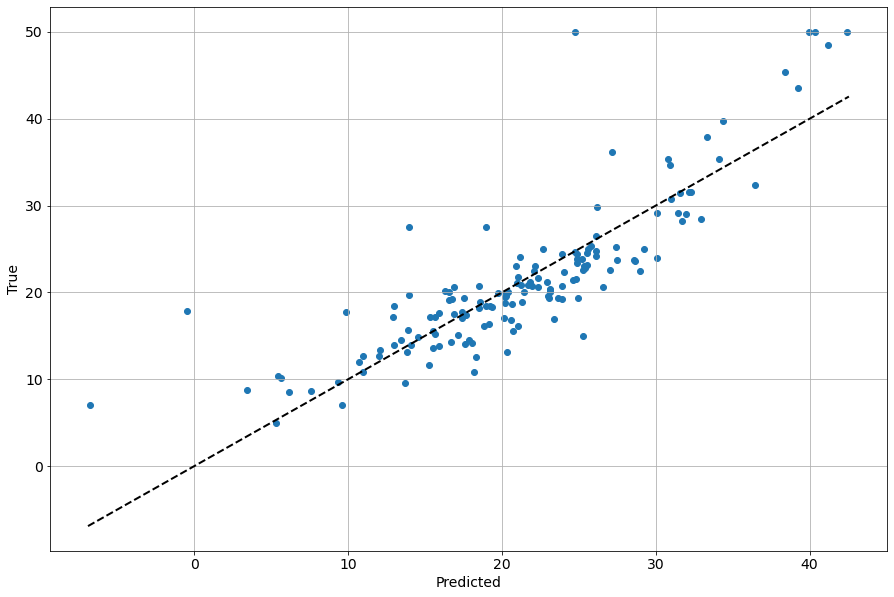

In [ ]:
# трансформер sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)

show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -7.466381704216013
ZN | 2.3800868391937917
INDUS | 0.1720825326666692
CHAS | 3.5408013485213696
NOX | -5.504378531624227
RM | 18.35225449806007
AGE | -0.9337916685959464
DIS | -11.519844288811012
RAD | 3.7678568615923003
TAX | -3.367866131939992
PTRATIO | -8.268731162131738
B | 4.4775266072848385
LSTAT | -18.922890261332252
Bias: 25.402289976271504

----- Evaluation for train -----
  R2: 0.7387251833812363
  RMSE: 4.792196740950351
  MAE: 3.349164627643318

----- Evaluation for test -----
  R2: 0.711020981158772
  RMSE: 4.640336329192624
  MAE: 3.1087318709305007


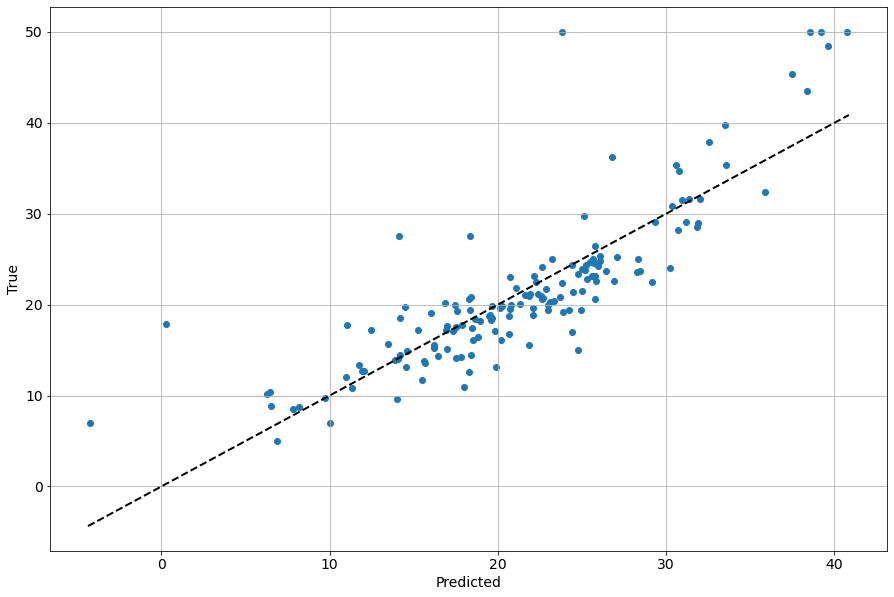

In [ ]:
# трансформер sklearn.preprocessing.MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)

show_linear_model_weights(reg, X_train.columns)

#Построение
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

C:\Users\ksyus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.13484405121520232
ZN | 0.19700064610823928
INDUS | -0.662216472662956
CHAS | 0.8098867261192233
NOX | -1.5436689470029095
RM | 1.9644355840165206
AGE | 0.1332599149592242
DIS | -3.2146019494800373
RAD | 0.37506502820960097
TAX | 0.0
PTRATIO | -1.609837291280881
B | 0.5705528509342769
LSTAT | -5.780487656832394
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671538602313817
  RMSE: 4.523976964245666
  MAE: 3.3424123933273076

----- Evaluation for test -----
  R2: 0.7407954511302968
  RMSE: 4.394784786716416
  MAE: 3.157433953239508


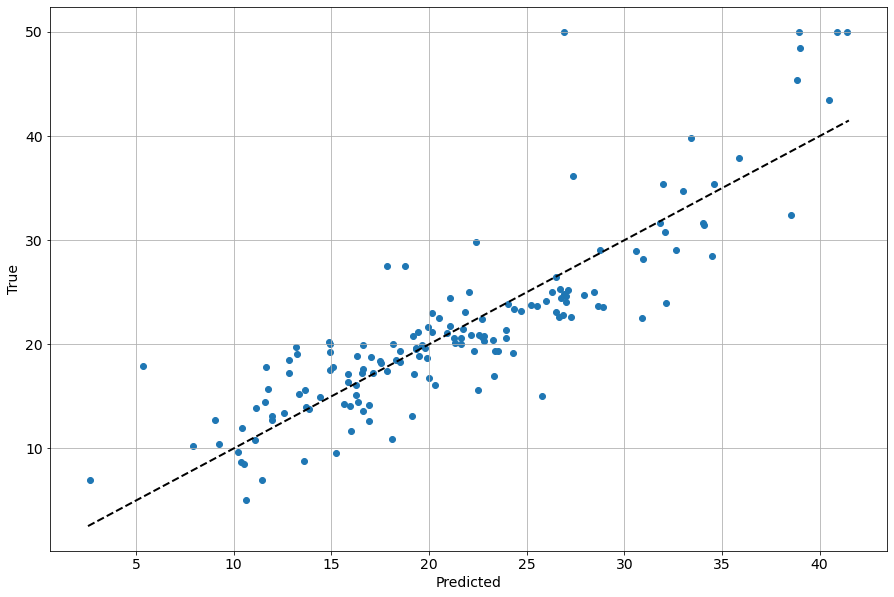

In [ ]:
# трансформер sklearn.preprocessing.PowerTransformer 

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer();
reg = Ridge();

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)

#Построение
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -0.6354248026769644
ZN | 0.21247875155483786
INDUS | -0.19069753346610674
CHAS | 0.2605943015905385
NOX | -1.0194424779228743
RM | 1.4166781303702853
AGE | -0.03427462098751011
DIS | -3.3894613461692304
RAD | 0.09374181598666413
TAX | -1.1503508496537098
PTRATIO | -1.3454447676064023
B | -0.1132491155690012
LSTAT | -5.51941624268833
Bias: 24.9807393665393

----- Evaluation for train -----
  R2: 0.7564771220754843
  RMSE: 4.626533886441017
  MAE: 3.4567558129911062

----- Evaluation for test -----
  R2: 0.7474437703194756
  RMSE: 4.338057915524537
  MAE: 3.1719469147498347


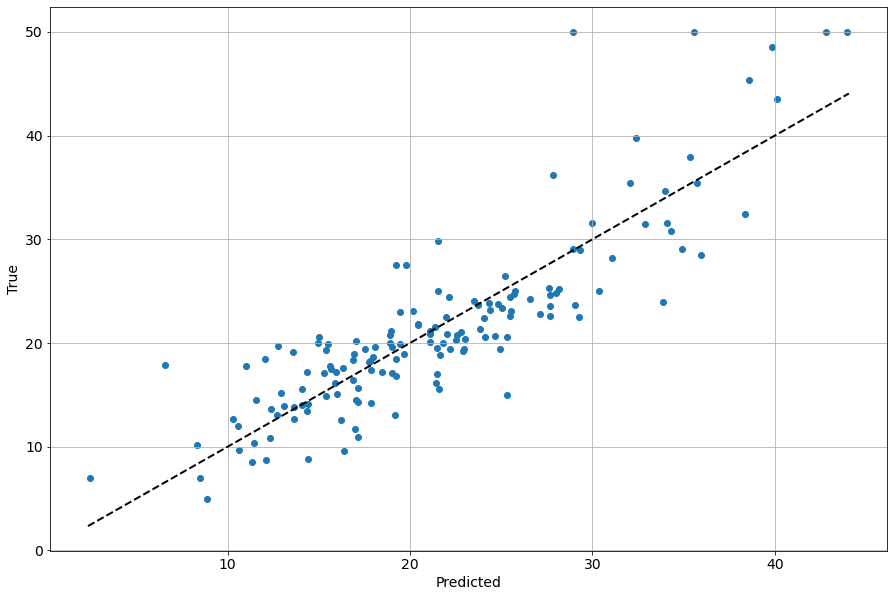

In [ ]:
#  трансформер sklearn.preprocessing.QuantileTransformer 

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=200,output_distribution='normal');
reg = Ridge();
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

# Создание наилучшей модели

По ходу выполнения лабораторной работы было выявлено, что улучшение результатов достигалось при следующих опытах:

- при применении базовой модели Ридж регресии
- при применении трансформера sklearn.preprocessing.PolynomialFeatures для генерации признака LSTAT в квадрате
- при исключении выбросов на уровне PRICE == 50 из данных

Создадим новую модель, применяя все вышеперечисленное. А далее уже на новой модели посмотрим эффективность инструментов выравнивания и стандартизации и выберем самый лучший вариант.

**модель+StandardScale**


----- Evaluation for train -----
  R2: 0.810006546420397
  RMSE: 3.509823758742913
  MAE: 2.6332156601162504

----- Evaluation for test -----
  R2: 0.787360602661678
  RMSE: 3.3414358865204608
  MAE: 2.5694784637122803


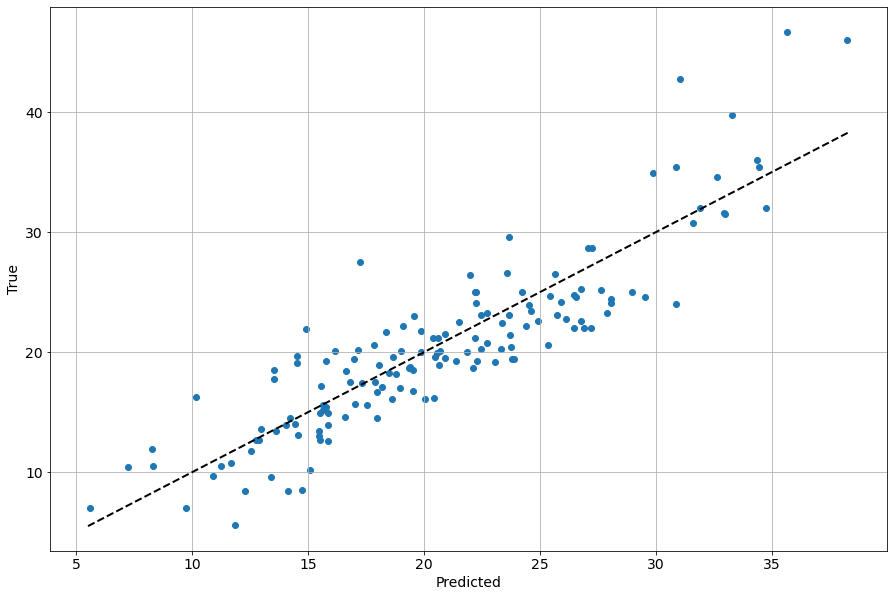

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Исключение выбросов на уровне 50
outliers_count = df[df['PRICE'] == 50].index
new_df=df.drop(outliers_count,axis=0)

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = new_df[feature_names]
# y - истинные значения (разметка)
y = new_df['PRICE']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

scaler = StandardScaler()
reg = Ridge(0.01)
poly = PolynomialFeatures(2)

#Выделяем необходимый признак и преобразуем его значения из строки в столбец
poly_X_train=np.array(X_train_new['LSTAT']).reshape(-1,1)
poly_X_test=np.array(X_test_new['LSTAT']).reshape(-1,1)

# "Обучение" трансформера - определение параметров средних и отклонений
poly.fit(poly_X_train)

# Стандартизация данных
X_train_scaled = poly.transform(poly_X_train)
X_test_scaled = poly.transform(poly_X_test)

#восстановление модели с новым признаком 
X_train_scaled = np.concatenate((np.array(X_train_new.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test_new.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train_new)
#show_linear_model_weights(reg, X_train_new.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test_new)

evaluate_regressor(reg, X_train_scaled, y_train_new, 'train')
evaluate_regressor(reg, X_test_scaled, y_test_new, 'test')

**модель+MinMaxScaler**


----- Evaluation for train -----
  R2: 0.810006546420397
  RMSE: 3.509823758742913
  MAE: 2.6332156601162504

----- Evaluation for test -----
  R2: 0.787360602661678
  RMSE: 3.3414358865204608
  MAE: 2.5694784637122803


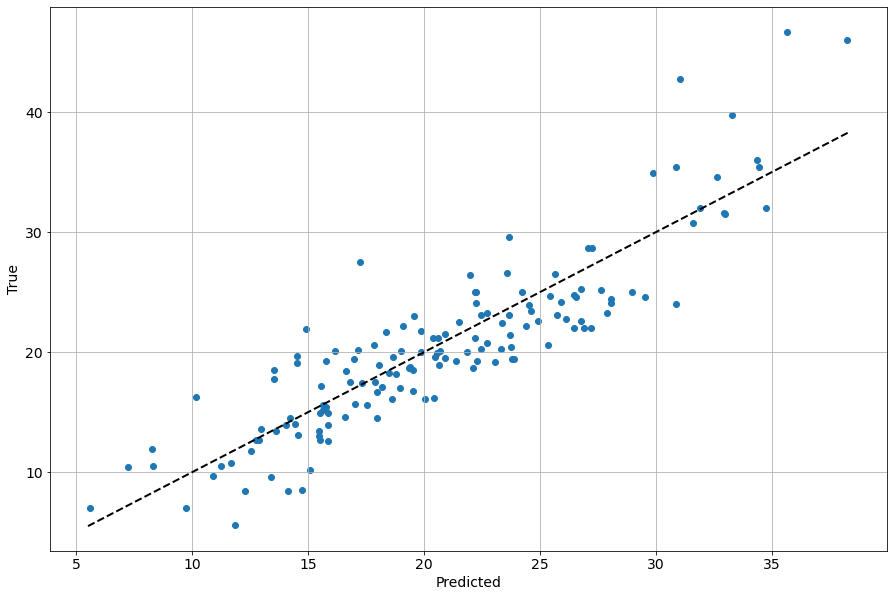

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Исключение выбросов на уровне 50
outliers_count = df[df['PRICE'] == 50].index
new_df=df.drop(outliers_count,axis=0)

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = new_df[feature_names]
# y - истинные значения (разметка)
y = new_df['PRICE']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

scaler = MinMaxScaler()
reg = Ridge(alpha=0.01)
poly = PolynomialFeatures(2)

#Выделяем необходимый признак и преобразуем его значения из строки в столбец
poly_X_train=np.array(X_train_new['LSTAT']).reshape(-1,1)
poly_X_test=np.array(X_test_new['LSTAT']).reshape(-1,1)

# "Обучение" трансформера - определение параметров средних и отклонений
poly.fit(poly_X_train)

# Стандартизация данных
X_train_scaled = poly.transform(poly_X_train)
X_test_scaled = poly.transform(poly_X_test)

#восстановление модели с новым признаком 
X_train_scaled = np.concatenate((np.array(X_train_new.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test_new.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train_new)
#show_linear_model_weights(reg, X_train_new.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test_new)

evaluate_regressor(reg, X_train_scaled, y_train_new, 'train')
evaluate_regressor(reg, X_test_scaled, y_test_new, 'test')

**модель+PowerTransformer**


----- Evaluation for train -----
  R2: 0.810006546420397
  RMSE: 3.509823758742913
  MAE: 2.6332156601162504

----- Evaluation for test -----
  R2: 0.787360602661678
  RMSE: 3.3414358865204608
  MAE: 2.5694784637122803


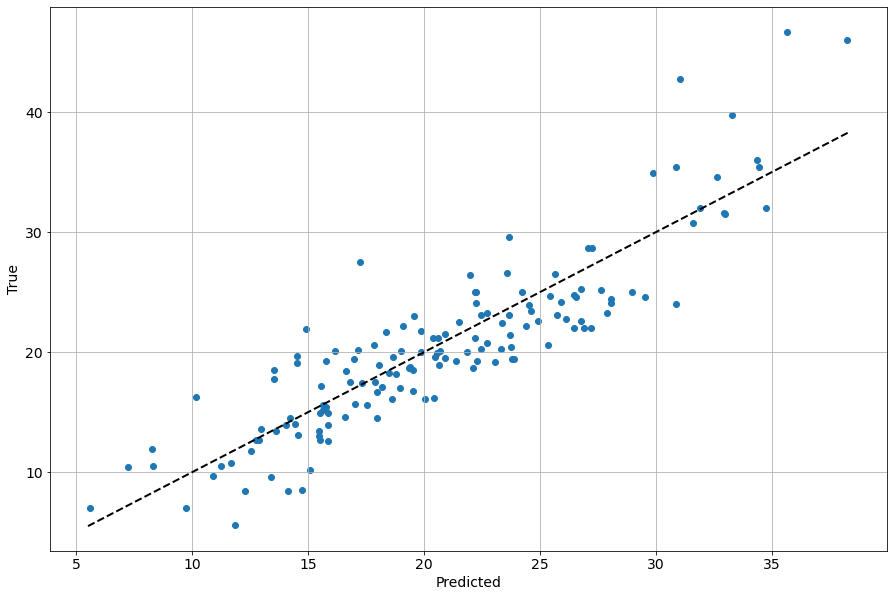

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Исключение выбросов на уровне 50
outliers_count = df[df['PRICE'] == 50].index
new_df=df.drop(outliers_count,axis=0)

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = new_df[feature_names]
# y - истинные значения (разметка)
y = new_df['PRICE']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

scaler = PowerTransformer();
reg = Ridge(alpha=0.01)
poly = PolynomialFeatures(2)

#Выделяем необходимый признак и преобразуем его значения из строки в столбец
poly_X_train=np.array(X_train_new['LSTAT']).reshape(-1,1)
poly_X_test=np.array(X_test_new['LSTAT']).reshape(-1,1)

# "Обучение" трансформера - определение параметров средних и отклонений
poly.fit(poly_X_train)

# Стандартизация данных
X_train_scaled = poly.transform(poly_X_train)
X_test_scaled = poly.transform(poly_X_test)

#восстановление модели с новым признаком 
X_train_scaled = np.concatenate((np.array(X_train_new.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test_new.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train_new)
#show_linear_model_weights(reg, X_train_new.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test_new)

evaluate_regressor(reg, X_train_scaled, y_train_new, 'train')
evaluate_regressor(reg, X_test_scaled, y_test_new, 'test')

**модель+QuantileTransformer**



----- Evaluation for train -----
  R2: 0.810006546420397
  RMSE: 3.509823758742913
  MAE: 2.6332156601162504

----- Evaluation for test -----
  R2: 0.787360602661678
  RMSE: 3.3414358865204608
  MAE: 2.5694784637122803


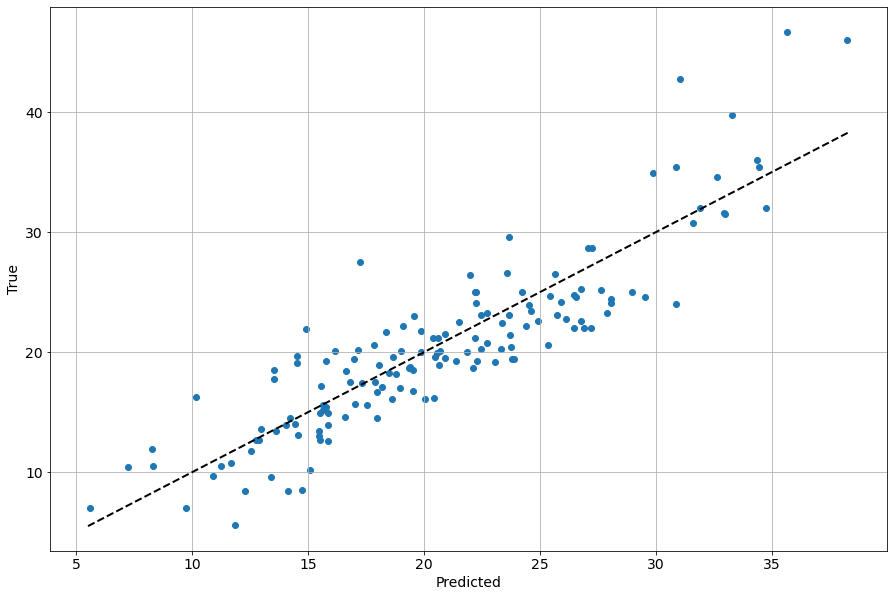

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Исключение выбросов на уровне 50
outliers_count = df[df['PRICE'] == 50].index
new_df=df.drop(outliers_count,axis=0)

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = new_df[feature_names]
# y - истинные значения (разметка)
y = new_df['PRICE']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

scaler = QuantileTransformer(n_quantiles=400,output_distribution='normal');
reg = Ridge(alpha=0.01)
poly = PolynomialFeatures(2)

#Выделяем необходимый признак и преобразуем его значения из строки в столбец
poly_X_train=np.array(X_train_new['LSTAT']).reshape(-1,1)
poly_X_test=np.array(X_test_new['LSTAT']).reshape(-1,1)

# "Обучение" трансформера - определение параметров средних и отклонений
poly.fit(poly_X_train)

# Стандартизация данных
X_train_scaled = poly.transform(poly_X_train)
X_test_scaled = poly.transform(poly_X_test)

#восстановление модели с новым признаком 
X_train_scaled = np.concatenate((np.array(X_train_new.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test_new.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train_new)
#show_linear_model_weights(reg, X_train_new.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test_new)

evaluate_regressor(reg, X_train_scaled, y_train_new, 'train')
8*evaluate_regressor(reg, X_test_scaled, y_test_new, 'test')

**сведем в таблицу полученные метрики по каждой из моделей (обучающая выборка)**

|Стандартизация или выравнивание| RMSE            | MAE              | R2              |
|:-----------------------------:|:---------------:|:----------------:|:---------------:|
|StandardScaler                 |3.509823758742913|2.6332156601162504|0.810006546420397|
|MinMaxScaler                   |3.509823758742913|2.6332156601162504|0.810006546420397|
|PowerTransformer               |3.509823758742913|2.6332156601162504|0.810006546420397|
|QuantileTransformer            |3.509823758742913|2.6332156601162504|0.810006546420397|


**сведем в таблицу полученные метрики по каждой из моделей (тестовая выборка)**


|Стандартизация или выравнивание| RMSE            | MAE              | R2              |
|:-----------------------------:|:---------------:|:----------------:|:---------------:|
|StandardScaler                 |3.341435886520461|2.5694784637122803|0.787360602661678|
|MinMaxScaler                   |3.341435886520461|2.5694784637122803|0.787360602661678|
|PowerTransformer               |3.341435886520461|2.5694784637122803|0.787360602661678|
|QuantileTransformer            |3.341435886520461|2.5694784637122803|0.787360602661678|

# Заключение

Как видно из приведенной выше таблицы, выбор инструментов стандартизации или выравнивания не оказывает влияния на итоговый результат. Но большое влияние оказало:
- при применении базовой модели Ридж регресии
- при применении трансформера sklearn.preprocessing.PolynomialFeatures для генерации признака LSTAT в квадрате
- при исключении выбросов на уровне PRICE == 50 из данных

Удалось добиться значительного увеличения метрики R2 (самое максимальное значение, которое было получено получено это значение при применении трансформера sklearn.preprocessing.PolynomialFeatures R2_train=0.7671538602313817, R2_test=0.7407954511302968), которая теперь равняется R2_train=0.810006546420397, R2_test=0.787360602661678, тоесть мы уже намного ближе к заветной единице.

Также удалось добиться уменьшения метрик RMSE и MAE (причем удалось уменьшить почти на единицу).
Таким образом, новая модель является наилучшей, а выбор стандартизации или выравнивания остается на вкус пользователя, так как результаты по метрикам одинаковы. 


# Вопросы:

1. **Какую задачу выполняет QuantileTransformer?** 

Преобразует объекты, используя информацию о квантилях. Преобразует функции в соответствии с равномерным или нормальным распределением, при этом уменьшая число выбросов.

2. **За что отвечает аргумент конструктора output_distribution класса QuantileTransformer?**

Выбирает распределение для преобразованных данных. Возможные варианты: «равномерное» (по умолчанию) или «нормальное».

3. **В чем отличие Ридж регрессии от линейной регрессии?**

Линейная регресия в случае высокой коллинеарности переменных неэффективна. Ридж регрессия позволяет снизить колинеарность. В Ридж регрессии вводится квадратичное смещение для уменьшения дисперсии, что  выводит коэффициенты переменных из строгих ограничений, вводя в модель небольшое смещение, но при этом значительно снижая дисперсию.

4. **Что такое регуляризация?**

Регуляризация - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Переобучение в большинстве случаев проявляется в том, что в получающихся многочленах слишком большие коэффициенты. Поэтому вводится ограничение (штраф) по слишком большим значеним весов. Таким образом, Происходит минимизация с учетом весовых коэффицетов.

5. **Как сказывается станартизация данных на результатах обучения с использованием регуляризации?**

Если сравнивать по метрике R2:
В случае линейной регресси и StandardScaler и в случае ридж регресси и StandardScaler результаты практически идентичны. 
В случае линейной регресси и MinMaxScaler и ридж регресси с StandardScaler метрика R2 ухудшается при прменении регуляризации. Аналогично для RMSE, MAE.


6. **В каких случаях нужно применять StandardScaler, а в каких MinmaxScaler?**

StandardScaler - когда хотим получить распределение со стандартным отклонением, равным 1.MinmaxScaler трансформирует признаки в заданном диапазоне (исходный минимум и исходный максимум). После применения StandardScaler диапазон значений больше

7. **Как сказывается применение QuantileTransformer на результатах обучения с использованием регуляризации?** 

Произведем сравнение по метрике R2. В сравнении с линейной регрессией показатель R2 не изменился. В сравнении со StandardScaler,  MinmaxScaler (с использованием регуляризации) наблюдается существенное улучшение метрики R2 на тестовой выборке.

8. **Как влияет значение $\alpha$ на результаты обучения Ридж регрессии?**

При увеличении $\alpha$, происходит уменьшение метрики R2: модель работает хуже. Но и слишком малое $\alpha$ не гарантирует хорошей работы.